In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline

/home/akhil/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/akhil/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/akhil/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/akhil/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/akhil/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expe

In [5]:
df = pd.read_csv('/home/akhil/Downloads/Python-Data-Science-and-Machine-Learning-Bootcamp-master/Machine Learning Sections/K-Nearest-Neighbors/Classified Data', index_col=0)

In [6]:
df.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [11]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [15]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [16]:
df_feat.columns


Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [18]:
df_feat.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = df_feat
y = df['TARGET CLASS']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [21]:
 from sklearn.neighbors import KNeighborsClassifier

/home/akhil/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
pred = knn.predict(x_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix 

In [26]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


## Elbow method to calculate the error

In [28]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [29]:
 plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

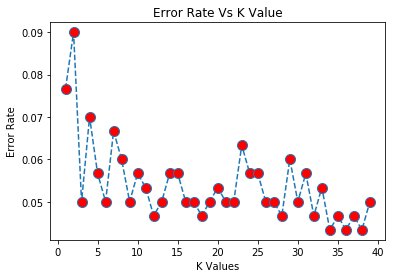

<Figure size 1440x432 with 0 Axes>

In [36]:
plt.plot(range(1,40), error_rate,marker='o', markerfacecolor='red', markersize=10,linestyle='dashed')
plt.title("Error Rate Vs K Value")
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.figure(figsize=(20,6))

In [37]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

